In [1]:
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import matplotlib.pyplot as plt




Alpha helices:
Residue 14: Q
Residue 15: R
Residue 16: L
Residue 17: Q
Residue 18: D
Residue 19: D
Residue 20: W
Residue 21: A
Residue 46: F
Residue 47: G
Residue 48: E
Residue 49: Y
Residue 50: F
Residue 51: A
Residue 52: L
Residue 53: S
Residue 54: E
Residue 55: Y
Residue 56: R
Residue 57: K
Residue 79: T
Residue 80: E
Residue 81: G
Residue 82: R
Residue 83: V
Residue 84: L
Residue 85: I
Residue 86: A
Residue 87: Q
Residue 88: Y
Residue 91: P
Residue 92: N
Residue 93: K
Residue 94: L
Residue 95: S
Residue 96: L
Residue 97: F
Residue 98: K
Residue 99: G
Residue 100: L
Residue 134: D
Residue 135: A
Residue 136: E
Residue 137: L
Residue 138: I
Residue 139: C
Residue 140: L
Residue 141: S
Residue 142: N

Beta sheets:
Residue 2: I
Residue 3: H
Residue 4: T
Residue 5: I
Residue 6: K
Residue 8: T
Residue 9: V
Residue 10: F
Residue 11: T
Residue 12: Y
Residue 61: L
Residue 62: G
Residue 63: T
Residue 111: L
Residue 112: F
Residue 113: L
Residue 114: Y
Residue 120: L
Residue 121: L
Residue 12

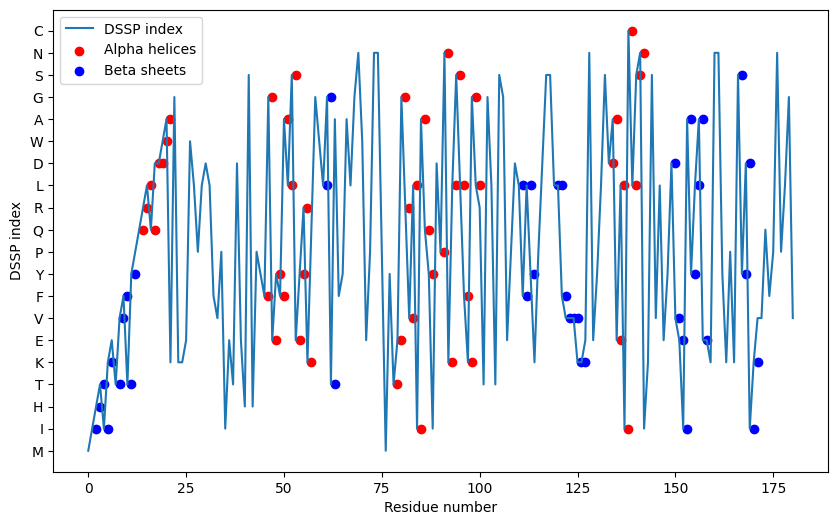

In [9]:


# 解析PDB文件
p = PDBParser()
structure = p.get_structure("protein_name", "/home/01.pdb")

# 使用DSSP分析二级结构
model = structure[0]
dssp = DSSP(model, "/home/01.pdb")
# 提取阿尔法螺旋和贝塔折叠的片段
helices = [res for res in dssp if res[2] == 'H']  # 阿尔法螺旋
sheets = [res for res in dssp if res[2] == 'E']  # 贝塔折叠

# 打印片段信息
print("Alpha helices:")
for res in helices:
    print(f"Residue {res[0]}: {res[1]}")

print("\nBeta sheets:")
for res in sheets:
    print(f"Residue {res[0]}: {res[1]}")

# 可视化
plt.figure(figsize=(10, 6))
plt.plot([res[1] for res in dssp], label='DSSP index')
plt.scatter([res[0] for res in helices], [res[1] for res in helices], color='r', label='Alpha helices')
plt.scatter([res[0] for res in sheets], [res[1] for res in sheets], color='b', label='Beta sheets')
plt.xlabel('Residue number')
plt.ylabel('DSSP index')
plt.legend()
plt.savefig("01.png")
plt.show()


In [8]:
def pdb2fold(pdbfile):
    # 解析PDB文件
    p = PDBParser()
    pdb_short_name=re_get_name(pdbfile)
    structure = p.get_structure(pdb_short_name, pdbfile)
    # 使用DSSP分析二级结构
    model = structure[0]
    dssp = DSSP(model, pdbfile)
    # 提取阿尔法螺旋和贝塔折叠的片段
    helices = [res for res in dssp if res[2] == 'H']  # 阿尔法螺旋
    sheets = [res for res in dssp if res[2] == 'E']  # 贝塔折叠

    # 打印片段信息
#     print("Alpha helices:")
#     for res in helices:
#         print(f"Residue {res[0]}: {res[1]}")

#     print("\nBeta sheets:")
#     for res in sheets:
#         print(f"Residue {res[0]}: {res[1]}")

    # 可视化
    plt.figure(figsize=(10, 6))
    plt.plot([res[1] for res in dssp], label='DSSP index')
    plt.scatter([res[0] for res in helices], [res[1] for res in helices], color='r', label='Alpha helices')
    plt.scatter([res[0] for res in sheets], [res[1] for res in sheets], color='b', label='Beta sheets')
    plt.xlabel('Residue number')
    plt.ylabel('DSSP index')
    plt.legend()
    plt.savefig("/home/tom/tom/pdb_photo/"+pdb_short_name+".png")
    print(f"{pdb_short_name} success")

In [3]:
import os

In [4]:
def get_files_in_current_directory(directory):
    file_paths = []
    for file in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file)):
            file_paths.append(os.path.join(directory, file))
    return file_paths

# 使用函数
directory = '/home/pdbs' # 当前目录
files = get_files_in_current_directory(directory)
print(len(files))
files[5]

31


'/home/pdbs/Leishmania_donovani_AWY94147.1__unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb'

In [5]:
import re

In [6]:
def re_get_name(filepath):
    # 定义正则表达式
    pattern = r'/home/pdbs/(.+?)\.'

    # 测试字符串
    test_string = '/home/pdbs/Syncephalastrum_racemosum_ORZ03420.1__unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb'

    # 使用正则表达式
    match = re.search(pattern, filepath)

    if match:
        print(match.group(1))  # 输出匹配的字符串
    return match.group(1)


Syncephalastrum_racemosum_ORZ03420
Syncephalastrum_racemosum_ORZ03420 success
0
Photobacterium_profundum__WP_011219706
Photobacterium_profundum__WP_011219706 success
1
Lysobacter_enzymogenes_ALN60766
Lysobacter_enzymogenes_ALN60766 success
2
Neurospora_crassa_mitochondria_KAK3505014
Neurospora_crassa_mitochondria_KAK3505014 success
3
Rhizopus_stolonifer_RCI06955
Rhizopus_stolonifer_RCI06955 success
4
Leishmania_donovani_AWY94147
Leishmania_donovani_AWY94147 success
5
Cunninghamella_echinulata_var
Cunninghamella_echinulata_var success
6
Streptomyces_antibioticus_KUN29041
Streptomyces_antibioticus_KUN29041 success
7
Drosophila_melanogaster_WP_010082499
Drosophila_melanogaster_WP_010082499 success
8
Bacillus_subtilis_WP_333560833
Bacillus_subtilis_WP_333560833 success
9
Pseudoalteromonas_espejiana_GEK56418
Pseudoalteromonas_espejiana_GEK56418 success
10
Photobacterium_profundum__WP_011219706
Photobacterium_profundum__WP_011219706 success
11
Saccharomyces_cerevisiae_WPD61020
Saccharomyces_

/home/tom/anaconda3/envs/tom/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Psychromonas_ingrahamii_WP_011770859 success
20
Serratia_marcescens_CAK6492809
Serratia_marcescens_CAK6492809 success
21
White_spot_syndrome_virus_AAW88443
White_spot_syndrome_virus_AAW88443 success
22
Azotobacter_chroococcum_subsp
Azotobacter_chroococcum_subsp success
23
Mycoplasma_genitalium__WP_010869364
Mycoplasma_genitalium__WP_010869364 success
24
Nicotiana_tabacum_XP_016456646
Nicotiana_tabacum_XP_016456646 success
25
Aliivibrio_salmonicida__WP_012550176
Aliivibrio_salmonicida__WP_012550176 success
26
Fowlpox_virus_Q9J546
Fowlpox_virus_Q9J546 success
27
Nostoc_sp
Nostoc_sp success
28
Aspergillus_nidulans_XP_681481
Aspergillus_nidulans_XP_681481 success
29
Bos_taurus_mitochondria_NP_787017
Bos_taurus_mitochondria_NP_787017 success
30


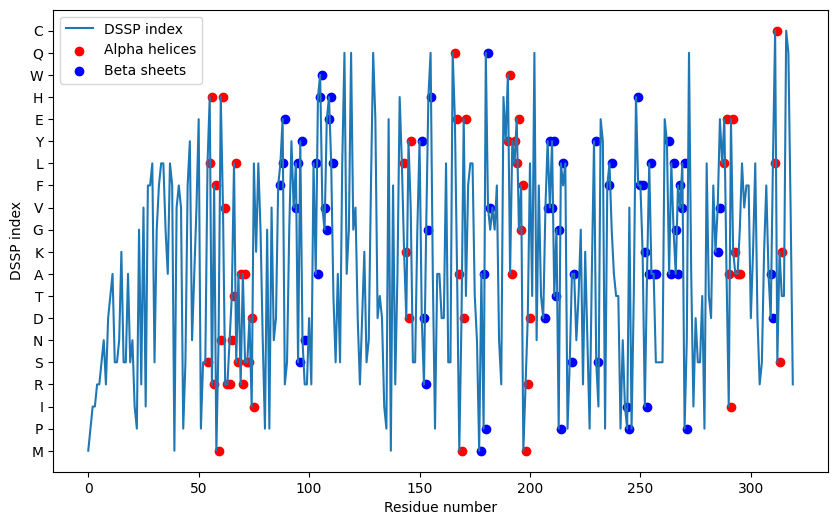

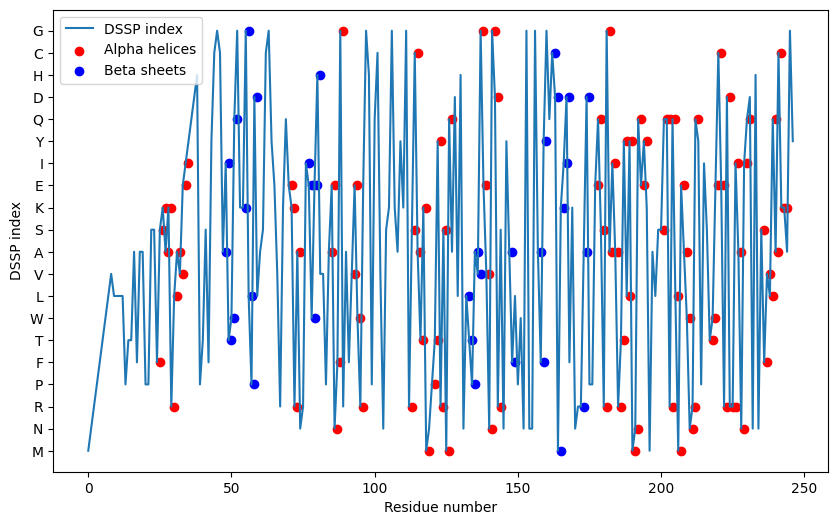

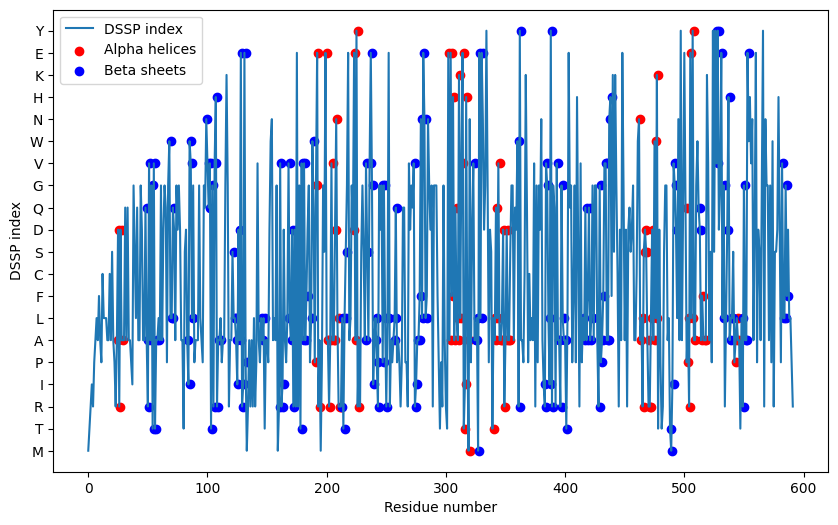

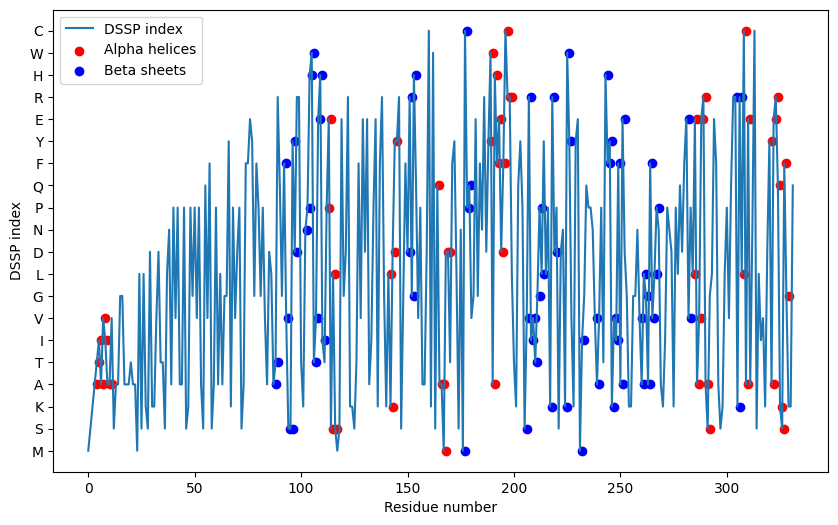

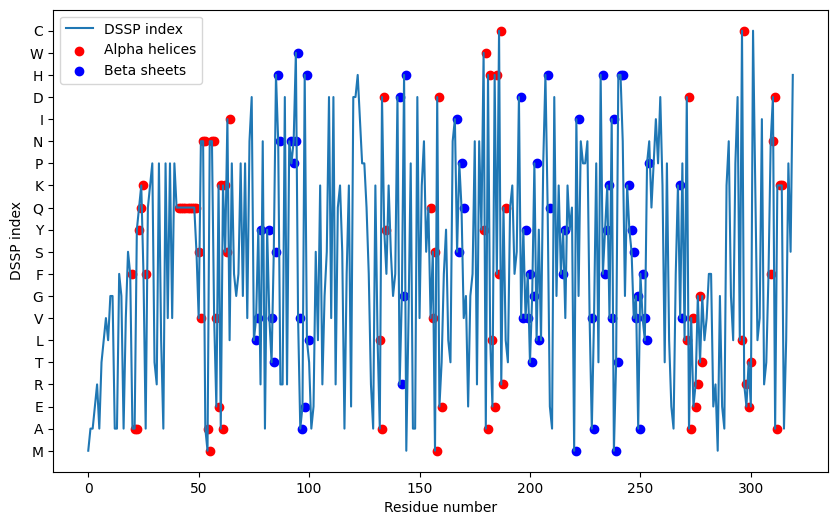

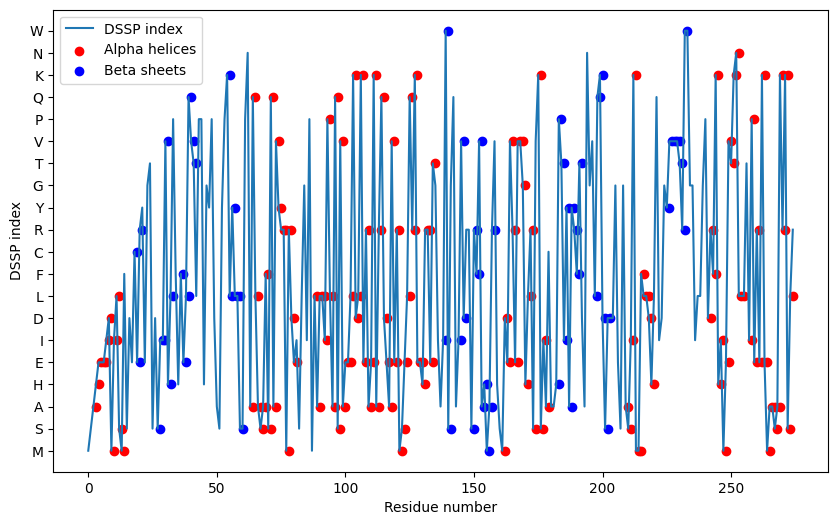

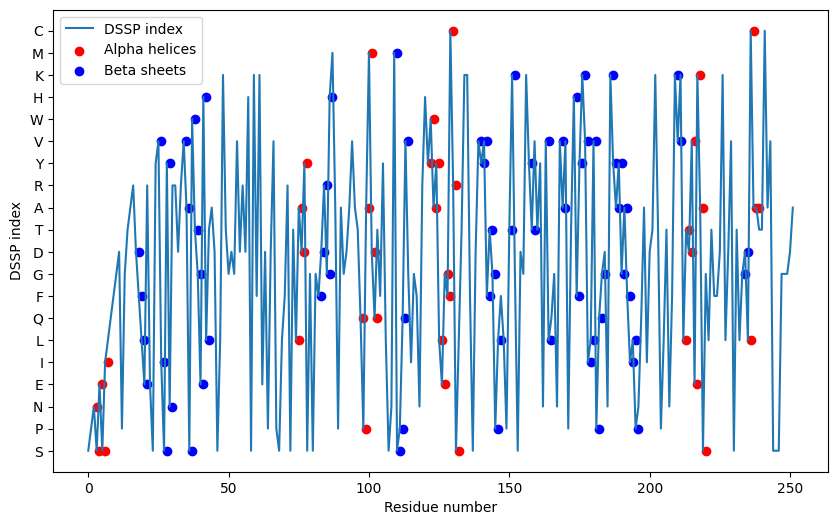

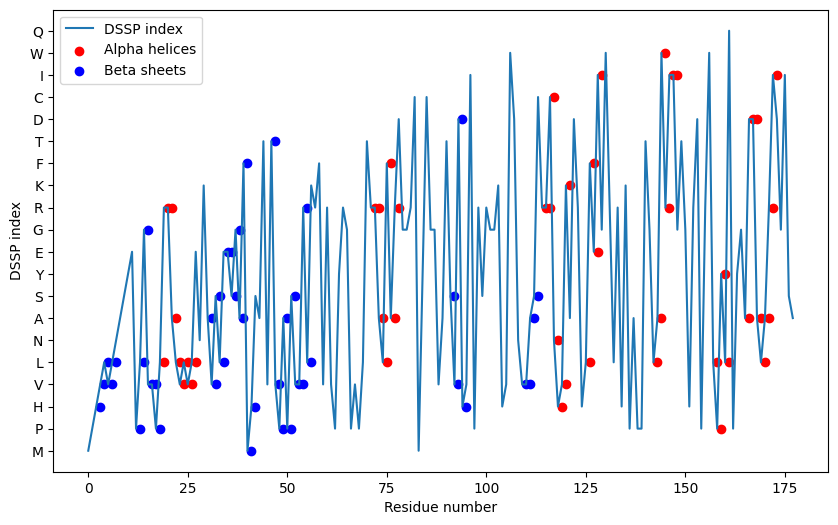

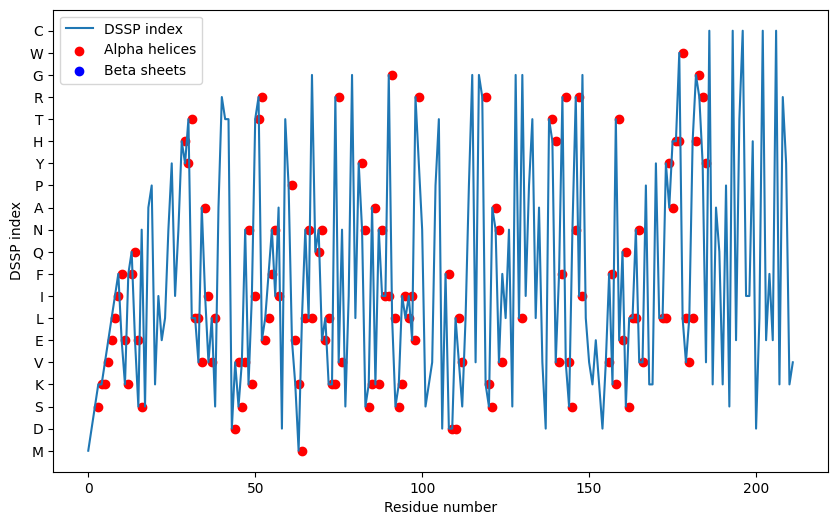

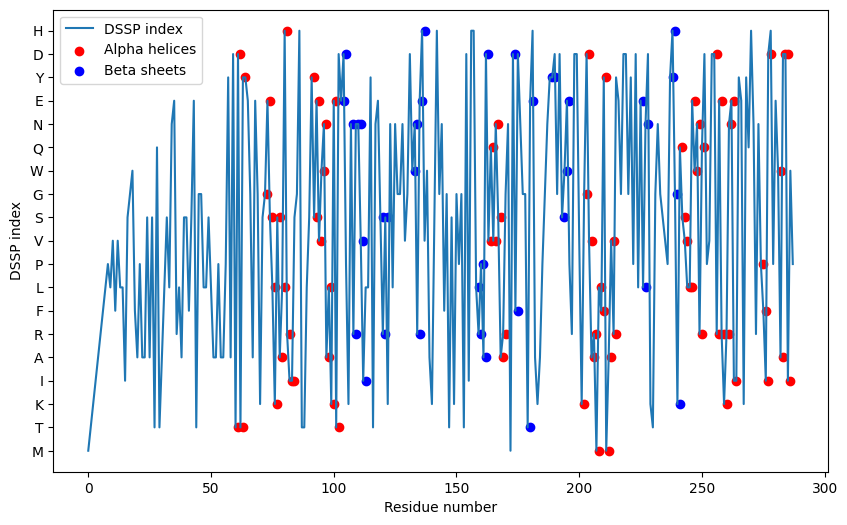

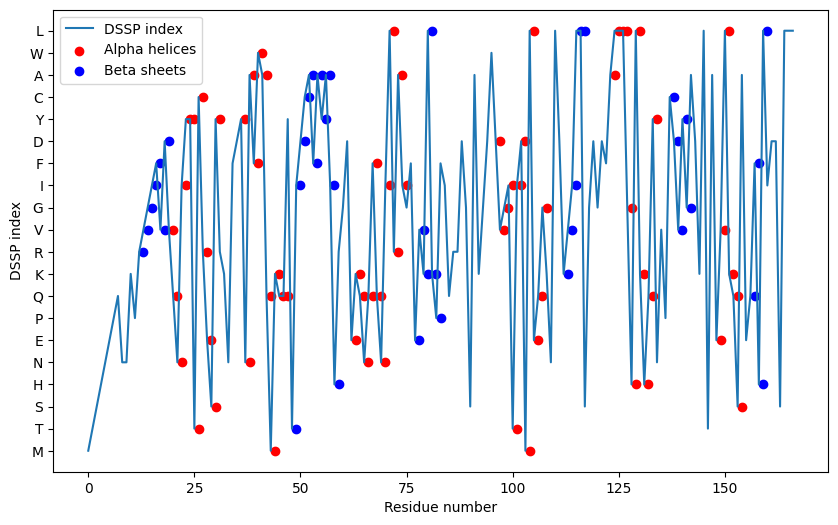

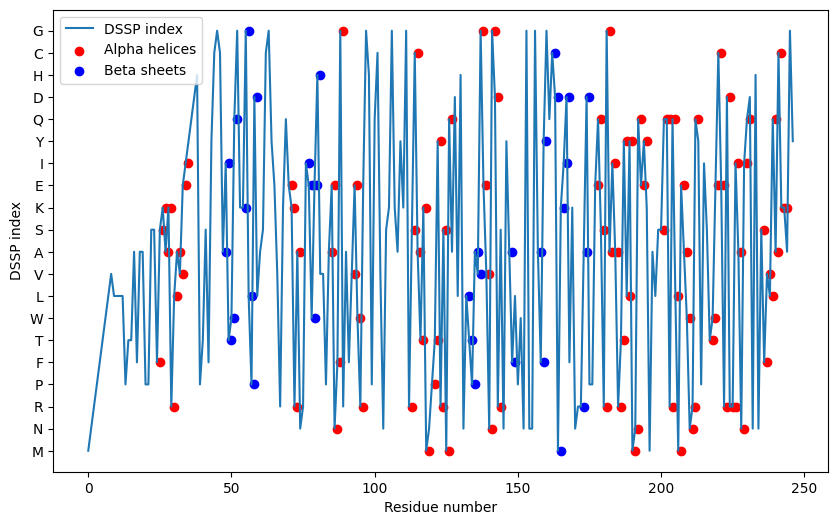

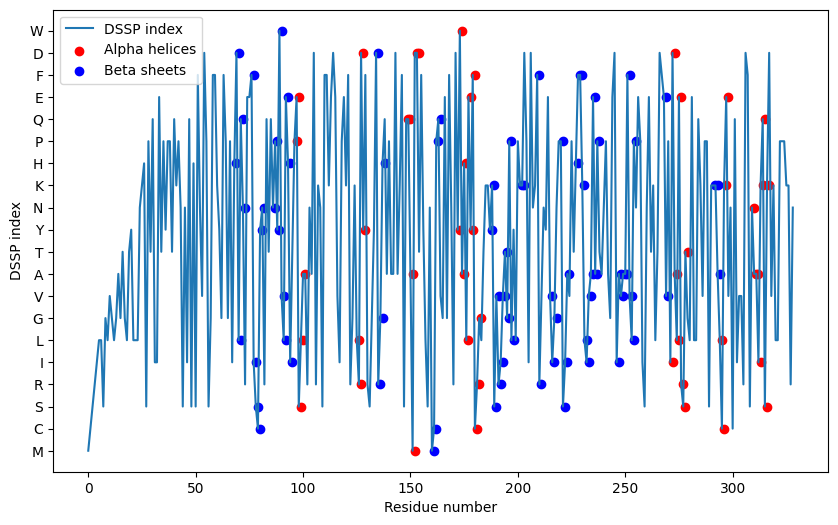

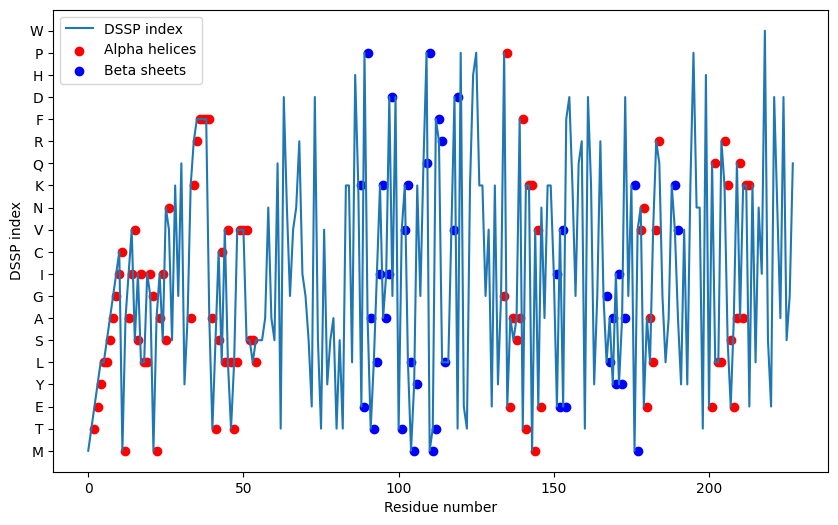

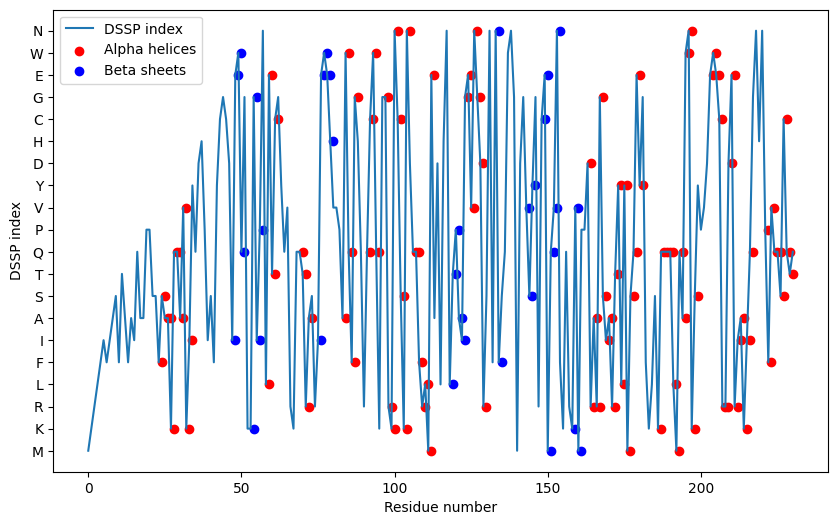

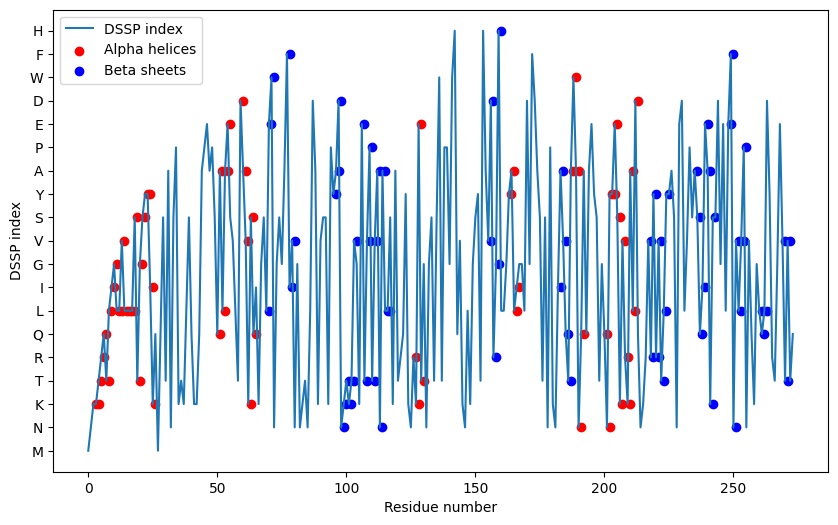

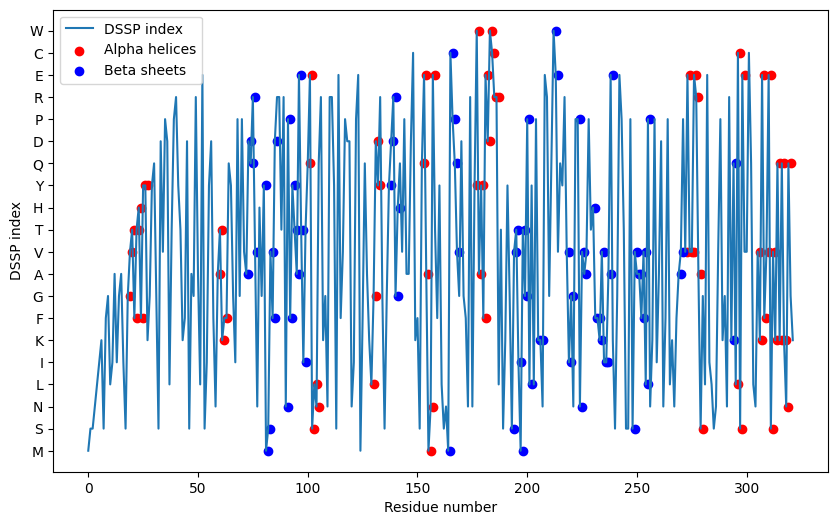

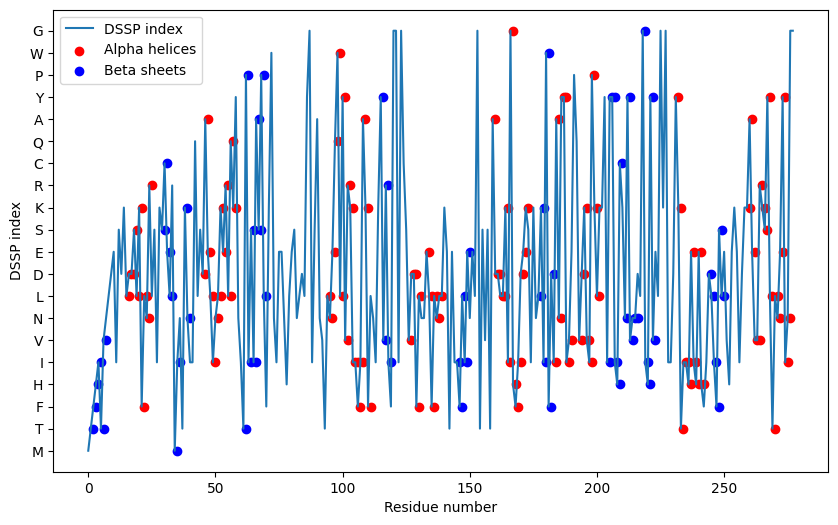

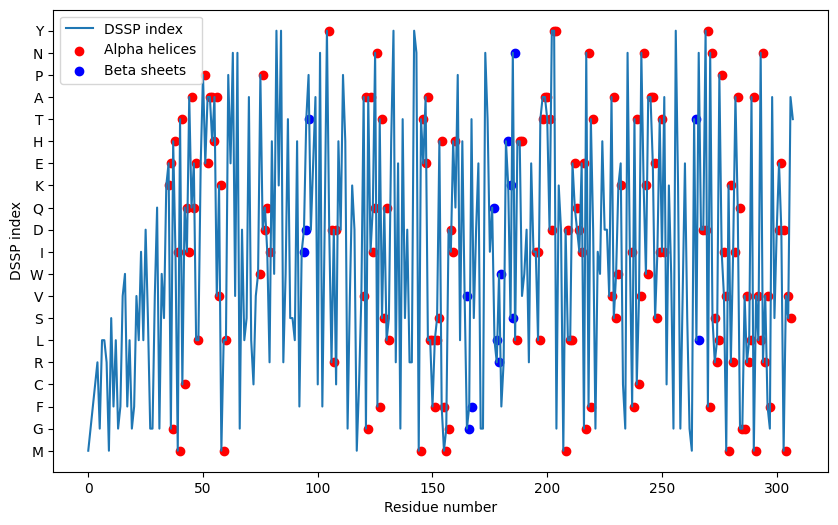

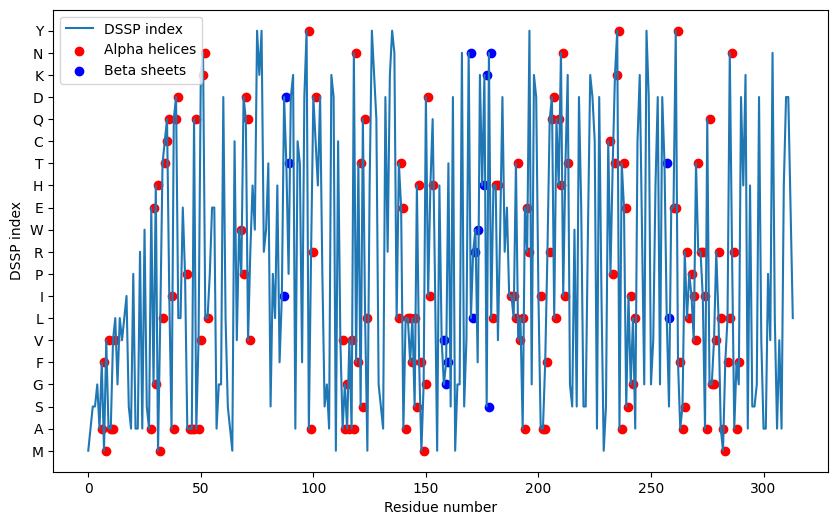

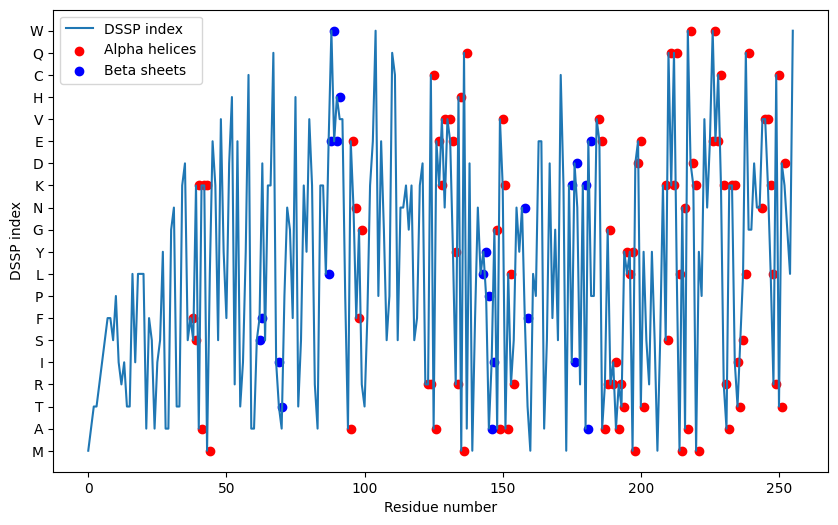

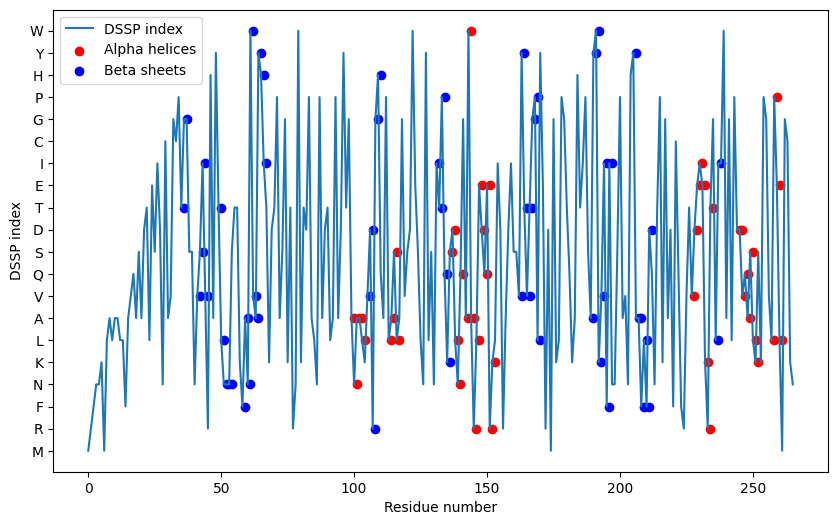

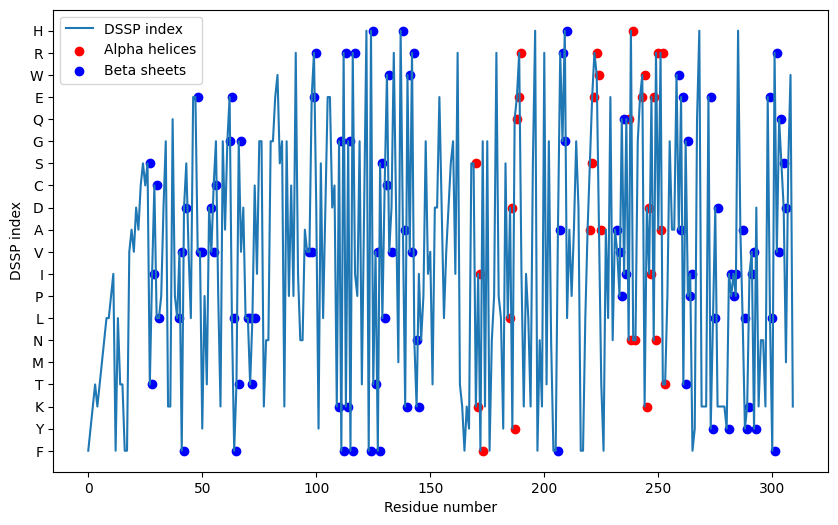

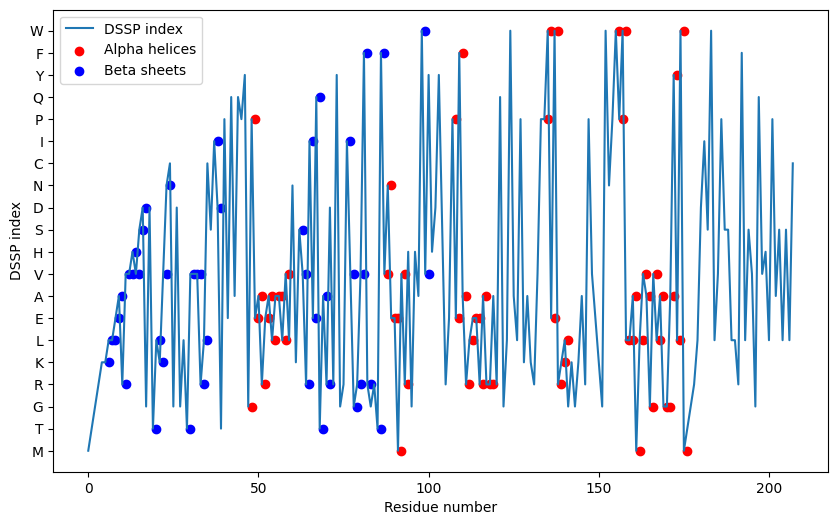

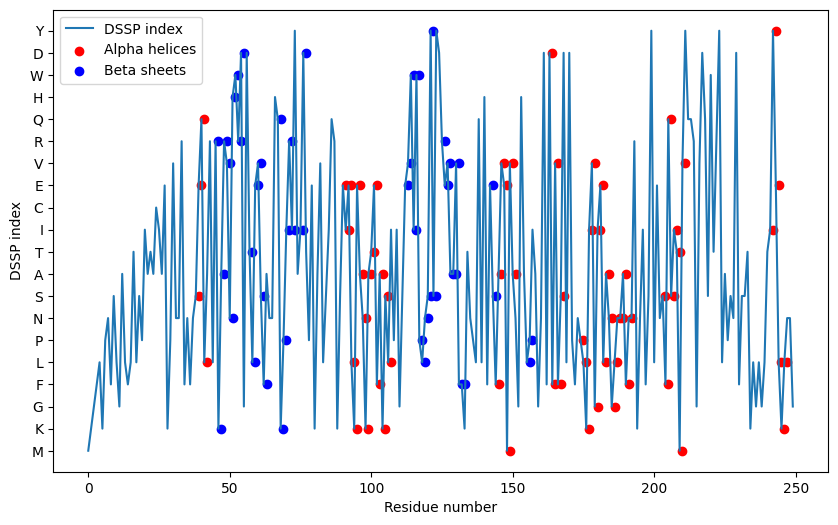

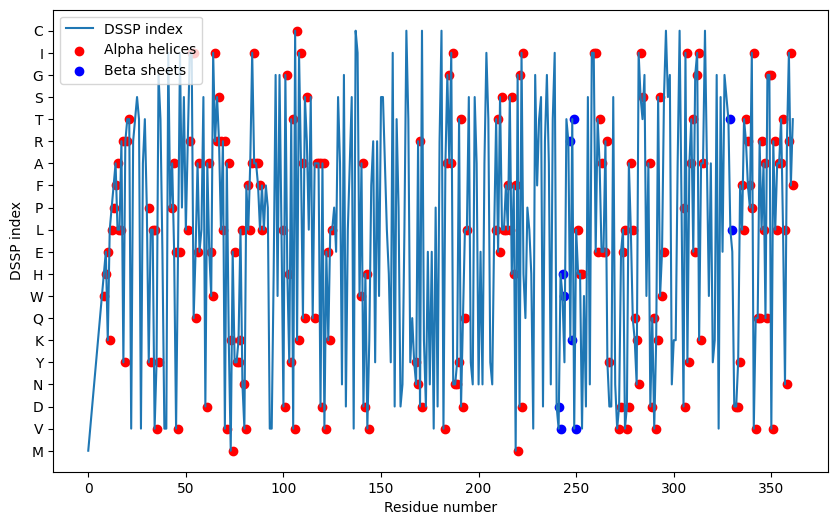

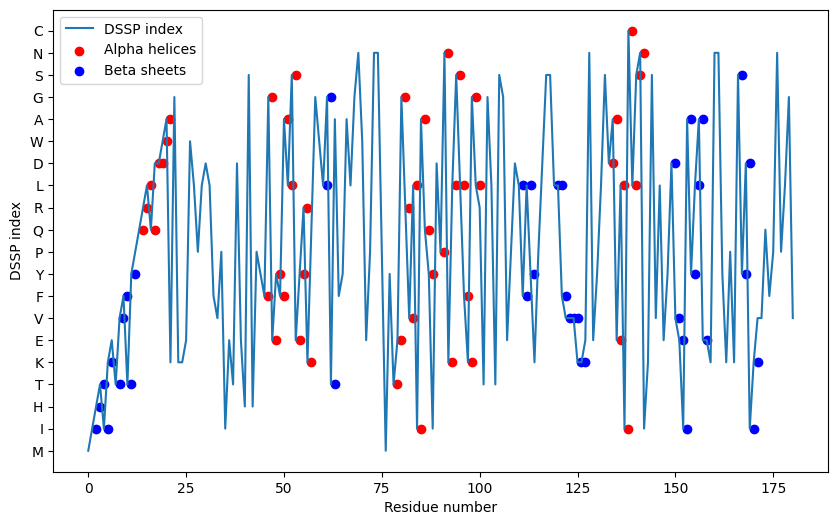

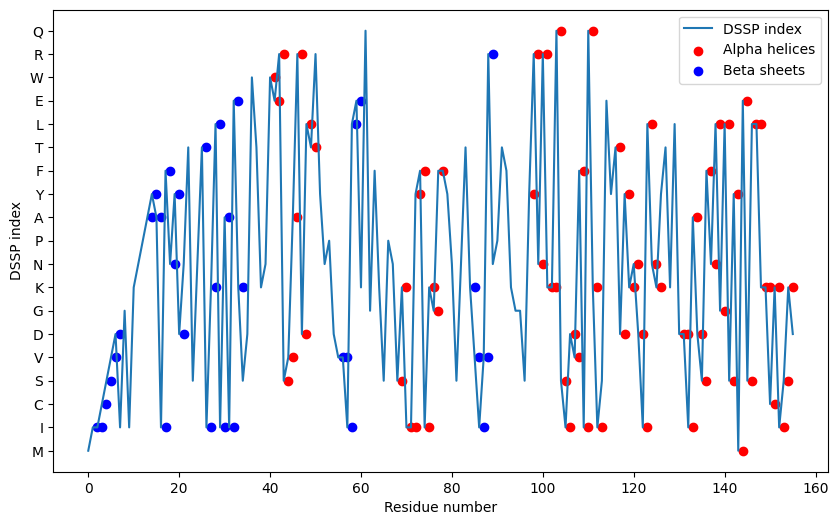

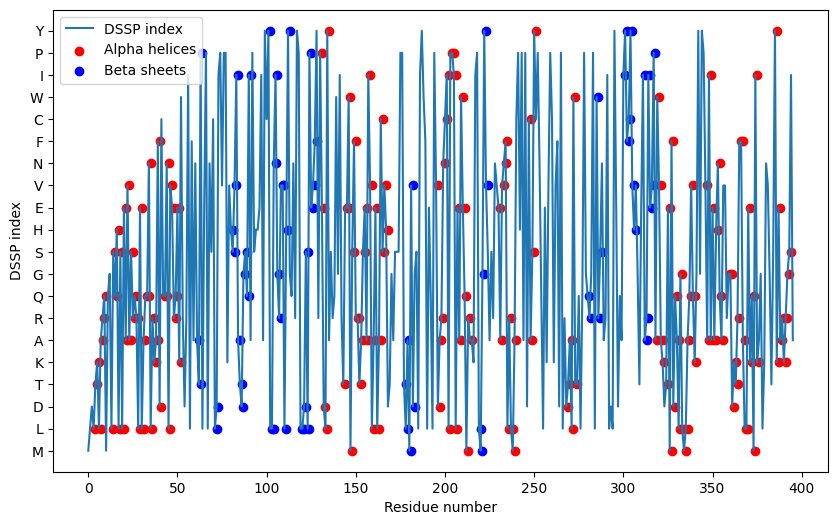

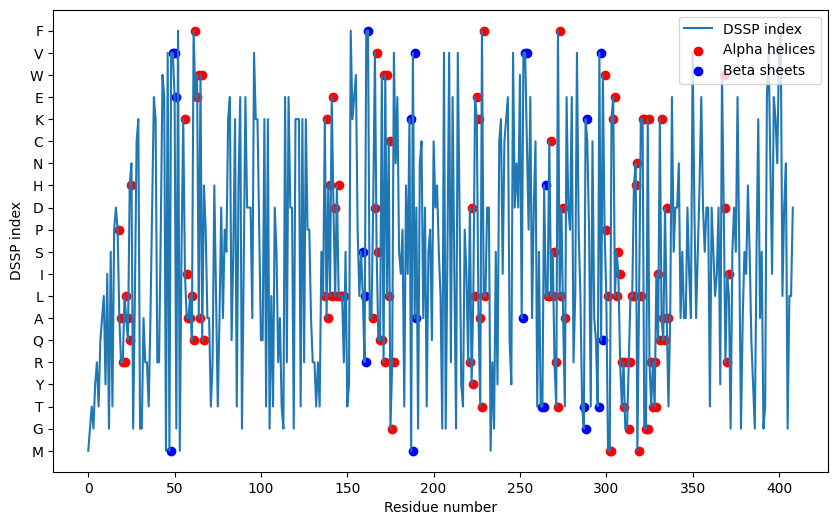

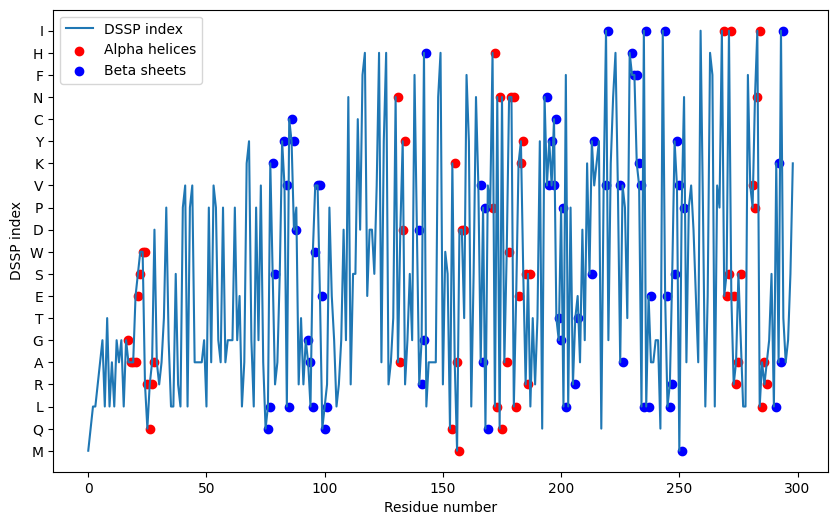

In [9]:
for i in range(len(files)):
    pdb2fold(files[i])
    print(i)

In [12]:
filepath='/home/tom/tom/Shewanellapsychromarinicola_edab0_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb'

Alpha helices:
Residue 194: I
Residue 195: Y
Residue 196: D
Residue 197: V
Residue 198: Q
Residue 315: L
Residue 316: A
Residue 317: Q
Residue 318: A
Residue 319: L
Residue 320: E
Residue 321: R
Residue 363: P
Residue 364: T
Residue 365: Q
Residue 366: V
Residue 372: A
Residue 373: E
Residue 374: S
Residue 375: V
Residue 376: A
Residue 377: L
Residue 378: G
Residue 379: E
Residue 380: A
Residue 381: N
Residue 382: A
Residue 494: E
Residue 495: A
Residue 496: E
Residue 497: M
Residue 498: V
Residue 499: L
Residue 500: Q
Residue 501: R
Residue 502: T
Residue 503: K
Residue 504: I
Residue 505: V
Residue 506: T
Residue 507: A
Residue 508: L
Residue 509: V
Residue 510: A
Residue 511: M
Residue 531: A
Residue 532: I
Residue 533: Q
Residue 534: N
Residue 535: L
Residue 536: V
Residue 537: D
Residue 538: A
Residue 539: L
Residue 540: N
Residue 541: A
Residue 650: I
Residue 651: E
Residue 652: D
Residue 653: W
Residue 654: A
Residue 670: N
Residue 671: A
Residue 672: F
Residue 673: R
Residue 67

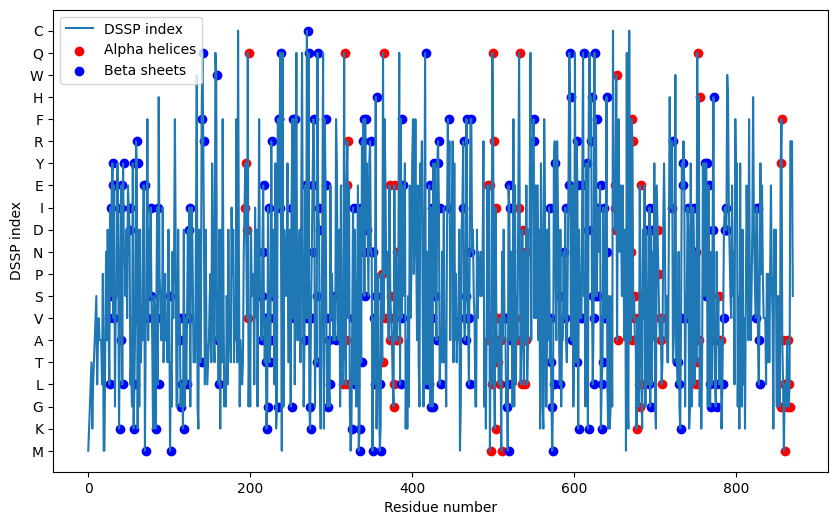

In [15]:
p = PDBParser()
pdb_short_name="Shewanellapsychromarinicola"
structure = p.get_structure(pdb_short_name, filepath)
# 使用DSSP分析二级结构
model = structure[0]
dssp = DSSP(model, filepath)
# 提取阿尔法螺旋和贝塔折叠的片段
helices = [res for res in dssp if res[2] == 'H']  # 阿尔法螺旋
sheets = [res for res in dssp if res[2] == 'E']  # 贝塔折叠

#打印片段信息
print("Alpha helices:")
for res in helices:
    print(f"Residue {res[0]}: {res[1]}")

print("\nBeta sheets:")
for res in sheets:
    print(f"Residue {res[0]}: {res[1]}")

# 可视化
plt.figure(figsize=(10, 6))
plt.plot([res[1] for res in dssp], label='DSSP index')
plt.scatter([res[0] for res in helices], [res[1] for res in helices], color='r', label='Alpha helices')
plt.scatter([res[0] for res in sheets], [res[1] for res in sheets], color='b', label='Beta sheets')
plt.xlabel('Residue number')
plt.ylabel('DSSP index')
plt.legend()
#plt.savefig("/home/tom/tom/pdb_photo/"+pdb_short_name+".png")
print(f"{pdb_short_name} success")

In [ ]:
len(files)